# Spatial Analysis in Python

---

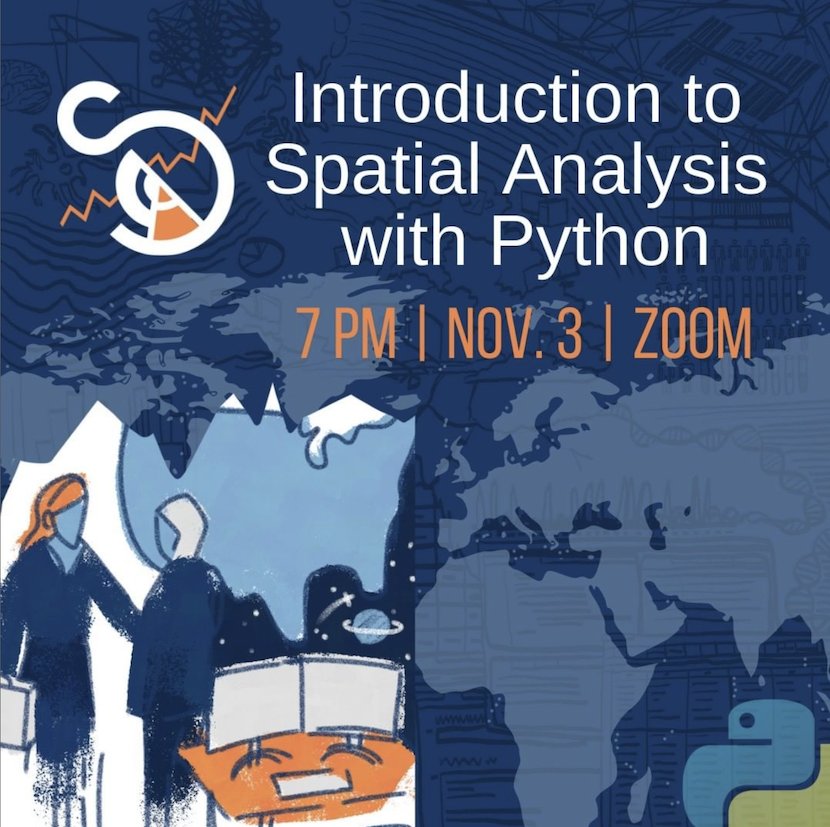

## Introduction

For this case, we will be covering some introductory spatial analysis concepts and visualizations. This will introduce you to the basics and hopefully reveal some of the things that you can do in Python. Towards the end, there will be an example of a more complex analysis as well as additional resources to explore on your own. For highly advanced spatial analysis techniques, you may need to write your own programs, utilize specialized packages, or use alternative software like ESRI's ArcGIS. 

Some commonly used packages include: 
  - pandas / geopandas
  - folium
  - shapely
  - pysal
  - pyproj
  - osmnx / pyrosm
  - matplotlib (visualization)
  - networkx

These are open source packages that are independent from any specific software. These tend to be the core libraries for spatial data science applications and are used in a number of commercial settings. 

## Choropleth Maps

To begin, let's take a look at choropleth maps. **Choropleth maps** are used to identify trends across regions. In this sense, they work well when you need to **compare data across categories**, whether that be continents, countries, states, etc. To introduce the idea of chlorpleth maps, we will use an example employing **Folium**. Folium is a really popular open source package that aids in the plotting of data associated with geospatial information. The maps produced with **Folium** have a lot of options for design and use as well as native interactive features.  

In [1]:
# Importing libraries. 
import pandas as pd
import folium

In [2]:
# Getting US State Data
url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
state_geo = f"{url}/us-states.json"
state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"
state_data = pd.read_csv(state_unemployment)

# Creating initial US map.
m = folium.Map(location=[48, -102], zoom_start=3)

# Plotting US Unemployment Choropleth
folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=state_data,
    columns=["State", "Unemployment"],
    key_on="feature.id",
    fill_color="BuPu",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Unemployment Rate (%)",
).add_to(m)

folium.LayerControl().add_to(m)

m

## Heatmaps

**Heatmaps** are similar to choropleth maps in that they use color to help communicate trends, but heatmaps work less with categorical data and more with data across less defined regions (most often using latitude and longitude). Here we will look at an applied example utilizing AirBnb data for NYC (https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data). 

In [3]:
from folium.plugins import HeatMap

In [5]:
nyc_data=pd.read_csv('AB_NYC_2019.csv', delimiter=',')

nyc_data.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [6]:
# Setting focus coordinates
nyc_coords = [40.738, -73.98] # Latitude and longitude

# Initializing the map, with a little bit of style. 
nyc_folium_map = folium.Map(location=nyc_coords, zoom_start=12, tiles='CartoDB dark_matter')
nyc_folium_map

In [7]:
# Selecting Data for our Heatmap
nyc_zip = zip(nyc_data['latitude'], nyc_data['longitude'], nyc_data['price'])
working_df = list(nyc_zip)

In [8]:
# Creating the Heatmap Layer
hm_layer = HeatMap(working_df,
                   min_opacity=0.2,
                   radius=8,
                   blur=6, 
                 )

In [9]:
# Adding the layer to the initial map
nyc_folium_map.add_child(hm_layer)
nyc_folium_map

## Geospatial Data

**Geopandas** is a key Python package as it facillitates the use of geospatial data in a relatively easy way. Geopandas works to combine the functionality of pandas with other packages that help manage spatial data. The two key data structures are GeoSeries and GeoDataframes. A GeoDataframe should contain a column with information on geometries (points, lines, polygons, multipolygons, etc.), often named 'geometry'. This column of geometries is a Geoseries. 

The following sections are based on the guidance provided here: https://sustainability-gis.readthedocs.io/en/latest/lessons/L1/intro-to-python-geostack.html

In [10]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 2.8 MB/s eta 0:00:01
     |████████████████████████████████| 7.7 MB 39.2 MB/s eta 0:00:01
     |████████████████████████████████| 19.3 MB 16.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 69.8 MB/s eta 0:00:01


In [11]:
import geopandas as gpd

## Working With Files

GeoSpatial data can come in a number of formats and can be accessed in a number of ways. Sometimes you will download shapefiles or other geospatial files, and other times you may access it directly through Open Street Map or hosted data repositories. 

To begin, it is helpful to just work with a file. In this respect, you knoe that you have the data and do not need to rely on outside connections to import the data correctly. To do this, we will look at a GeoJSON file containing building data for Helsinki. 


In [12]:
# Filepath
fp = "buildings.geojson"

# Read the file
buildings = gpd.read_file(fp)

# How does it look?
buildings.head()

addr:city addr:country addr:housenumber addr:housename addr:postcode  \
0  Helsinki         None               29           None         00170   
1  Helsinki         None                2           None         00100   
2  Helsinki           FI            22-24           None          None   
3  Helsinki         None                2           None         00100   
4      None           FI             None           None          None   

         addr:street             email         name  \
0        Unioninkatu              None         None   
1          Kaivokatu  ainfo@ateneum.fi      Ateneum   
2    Mannerheimintie              None  Lasipalatsi   
3  Mannerheiminaukio              None       Kiasma   
4               None              None         None   

                                       opening_hours operator  ... start_date  \
0                                               None     None  ...       None   
1  Tu, Fr 10:00-18:00; We-Th 10:00-20:00; Sa-Su 1...     None  ...       1887   
2                                               None     None  ...       1936   
3  Tu 10:00-17:00; We-Fr 10:00-20:30; Sa 10:00-18...     None  ...       1998   
4                                               None     None  ...       None   

                 wikipedia        id   timestamp version  \
0                     None   4253124  1542041335       4   
1  fi:Ateneumin taidemuseo   8033120  1544822447      27   
2           fi:Lasipalatsi   8035238  1533831167      23   
3     fi:Kiasma (rakennus)   8042215  1553963033      30   
4                     None  15243643  1546289715       7   

                                                tags osm_type internet_access  \
0                                               None      way            None   
1  {'architect': 'Theodor Höijer', 'contact:websi...      way            None   
2  {'name:fi': 'Lasipalatsi', 'name:sv': 'Glaspal...      way            None   
3  {'name:en': 'Museum of Modern Art Kiasma', 'na...      way            None   
4                                               None      way            None   

  changeset                                           geometry  
0       NaN  POLYGON ((24.95121 60.16999, 24.95122 60.16988...  
1       NaN  POLYGON ((24.94477 60.16982, 24.94450 60.16981...  
2       NaN  POLYGON ((24.93561 60.17045, 24.93555 60.17054...  
3       NaN  POLYGON ((24.93682 60.17152, 24.93662 60.17150...  
4       NaN  POLYGON ((24.93675 60.16779, 24.93660 60.16789...  

[5 rows x 34 columns]

## Basic GeoPandas Applications

**GeoPandas** shares a lot of functionality with Pandas. Therefore, it is helpful to see some of the basic applications of these base functionalities. 

In [13]:
# Running Descriptive Stats
buildings.describe()

id     timestamp     version  changeset
count  4.860000e+02  4.860000e+02  486.000000       66.0
mean   1.400780e+08  1.455829e+09    4.849794        0.0
std    1.633527e+08  9.247528e+07    4.561162        0.0
min    8.253000e+03  1.197929e+09    1.000000        0.0
25%    2.294267e+07  1.374229e+09    2.000000        0.0
50%    1.228699e+08  1.493288e+09    3.000000        0.0
75%    1.359805e+08  1.530222e+09    7.000000        0.0
max    1.042029e+09  1.555840e+09   31.000000        0.0

<AxesSubplot:>

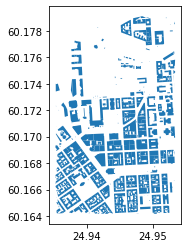

In [14]:
# Creating a simple polygon plot
buildings.plot()

In [15]:
# Saving an output as a shapefile. Do not need to run, but here for reference. 
outfp = "buildings_copy.shp"
buildings.to_file(outfp)

<ipython-input-15-6d2eea74152e>:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  buildings.to_file(outfp)


## Reprojecting Data

From the previous maps, we can see that the coordinates on the x and y axis hint that our geometries are represented in decimal degrees (WGS84). In many cases, we will want to reproject our data to another Coordinate Reference System (CRS). We can first access the CRS information of the GeoDataFrame by accessing an attribute called crs.

In [16]:
buildings.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

We can reproject our data by using a method to_crs(). We can reproject our data into EPSG 3067, the most widely used projected coordinate reference system used in Finland, EUREF-FIN:

In [17]:
projected = buildings.to_crs(epsg=3067)
projected.crs

<Derived Projected CRS: EPSG:3067>
Name: ETRS89 / TM35FIN(E,N)
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Finland - onshore and offshore.
- bounds: (19.08, 58.84, 31.59, 70.09)
Coordinate Operation:
- name: TM35FIN
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

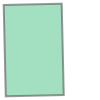

In [18]:
# Checking Proj Geom
projected_geom = projected.loc[0, "geometry"]
projected_geom

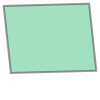

In [19]:
# Comparing with Orig Geom - Doesn't show up, right?
orig_geom = buildings.loc[0, "geometry"]
orig_geom

## Calculating Building Area

Now that we have the reprojected data, we can work to identify the building area in the dataset. This is as easy as using base Pandas functions and the **area** GeoPandas attribute. 

In [20]:
projected["building_area"] = projected.area
projected["building_area"].describe()

count     486.000000
mean     1072.326027
std      1165.641499
min         0.008782
25%       218.602850
50%       800.512868
75%      1428.335280
max      8244.176220
Name: building_area, dtype: float64

## Spatial Joins

A commonly needed GIS functionality, is to be able to merge information between two layers using location as the key. Hence, it is somewhat similar approach as table join but because the operation is based on geometries, it is called a spatial join. We will see how we can conduct a spatial join and merge information between two layers. 

In [22]:
# Filepath
fp = "restaurants.geojson"

# Read the file
restaurants = gpd.read_file(fp)

# How does it look?
restaurants.head()

changeset                                               tags        lon  \
0          0  {'smoking': 'outside', 'seasonal:summer': 'yes...  24.952852   
1          0  {'diet:vegan': 'yes', 'diet:vegetarian': 'yes'...  24.944996   
2          0             {'lunch': 'yes', 'smoking': 'outside'}  24.941545   
3          0  {'created_by': 'Potlatch 0.4a', 'wheelchair': ...  24.937647   
4          0                          {'wheelchair': 'limited'}  24.947668   

         id   timestamp  version        lat addr:city addr:country  \
0  56418307  1429855475       11  60.178001  Helsinki         None   
1  59622323  1553963252       10  60.172112  Helsinki         None   
2  59631978  1429827254        5  60.176704  Helsinki         None   
3  62967659  1493503123        4  60.171337  Helsinki         None   
4  76474077  1468481090        8  60.179020  Helsinki           FI   

  addr:housenumber  ... operator             phone   url  \
0                3  ...     None  +358 44 945 9423  None   
1               18  ...     None              None  None   
2                5  ...     None    +358 9 632 223  None   
3              1 B  ...     None              None  None   
4                6  ...     None              None  None   

                                             website     amenity  \
0       https://www.facebook.com/RavintolalaivaMaria  restaurant   
1                               https://www.maya.fi/  restaurant   
2  http://www.sinunjuhlasi.fi/ravintolat-2/ravint...  restaurant   
3  https://fazer.fi/kahvilat-ja-leipomot/ravintol...  restaurant   
4                     https://www.graniittilinna.com  restaurant   

  internet_access   pub source osm_type                   geometry  
0            None  None   None     node  POINT (24.95285 60.17800)  
1            None  None   None     node  POINT (24.94500 60.17211)  
2            None  None   None     node  POINT (24.94155 60.17670)  
3            None  None   None     node  POINT (24.93765 60.17134)  
4            None  None   None     node  POINT (24.94767 60.17902)  

[5 rows x 26 columns]

In [23]:
import geopandas as gpd
# Join information from buildings to restaurants using the sjoin function in geopandas
join = gpd.sjoin(restaurants, buildings)

# Show rows
join.head()

changeset_left                                          tags_left  \
0                0  {'smoking': 'outside', 'seasonal:summer': 'yes...   
1                0  {'diet:vegan': 'yes', 'diet:vegetarian': 'yes'...   
72               0   {'cuisine': 'nepalese', 'wheelchair': 'limited'}   
2                0             {'lunch': 'yes', 'smoking': 'outside'}   
3                0  {'created_by': 'Potlatch 0.4a', 'wheelchair': ...   

          lon     id_left  timestamp_left  version_left        lat  \
0   24.952852    56418307      1429855475            11  60.178001   
1   24.944996    59622323      1553963252            10  60.172112   
72  24.944563  1369465630      1548278645             3  60.172104   
2   24.941545    59631978      1429827254             5  60.176704   
3   24.937647    62967659      1493503123             4  60.171337   

   addr:city_left addr:country_left addr:housenumber_left  ... source_right  \
0        Helsinki              None                     3  ...         None   
1        Helsinki              None                    18  ...         None   
72       Helsinki              None                     8  ...         None   
2        Helsinki              None                     5  ...         None   
3        Helsinki              None                   1 B  ...         None   

     start_date                wikipedia   id_right timestamp_right  \
0          None                     None   17028575      1287484999   
1          None                     None      36737      1493288031   
72         None                     None      36737      1493288031   
2   before 1943                     None   25891166      1522084241   
3       1938-10  fi:Postitalo (Helsinki)  122595218      1544822461   

   version_right                                        tags_right  \
0              5                                              None   
1              4                          {'type': 'multipolygon'}   
72             4                          {'type': 'multipolygon'}   
2              7                                              None   
3              7  {'name:sv': 'Posthuset', 'wikidata': 'Q3399855'}   

   osm_type_right internet_access_right changeset_right  
0             way                  None             NaN  
1        relation                  None             0.0  
72       relation                  None             0.0  
2             way                  None             NaN  
3             way                  None             NaN  

[5 rows x 60 columns]

In [24]:
# If you get an error regarding rtree or pygeos, run this code and then re-run the code that delivered the error. 
!pip uninstall -q rtree
!pip uninstall -q pygeos
!pip uninstall -q geopandas
!sudo apt install -q libspatialindex-dev
!pip install -q rtree
!pip install -q pygeos
!pip install -q geopandas


Proceed (y/n)? ^C
ERROR: Operation cancelled by user
Proceed (y/n)? ^C
ERROR: Operation cancelled by user
Password:
sudo: a password is required
^C
ERROR: Operation cancelled by user
^C
ERROR: Operation cancelled by user


<AxesSubplot:>

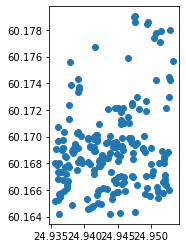

In [25]:
# Visualize the data as well
join.plot()

### Selecting Data With Joins


/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


<AxesSubplot:>

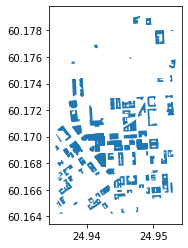

In [26]:
# Merge information from restaurants to buildings (conducts selection at the same time)
join2 = gpd.sjoin(buildings, restaurants, how="inner", op="intersects")
join2.plot()

### Highlighting Building Types and Their Locations

In [27]:
import matplotlib.pyplot as plt

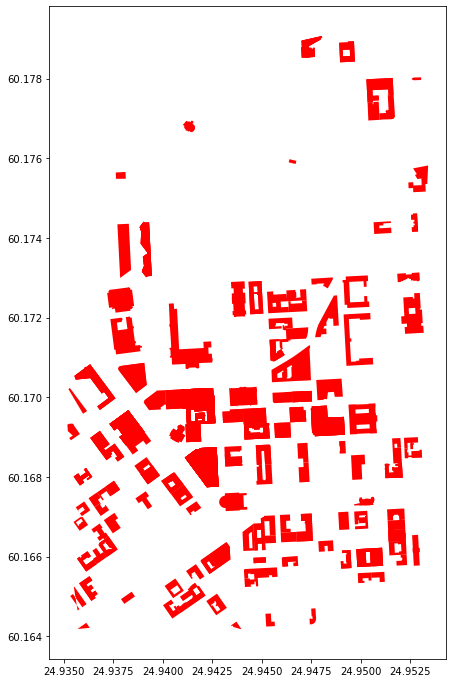

In [28]:
# Showing joined data with a simple visualization
ax = join2.plot(facecolor="red", figsize=(12,12))

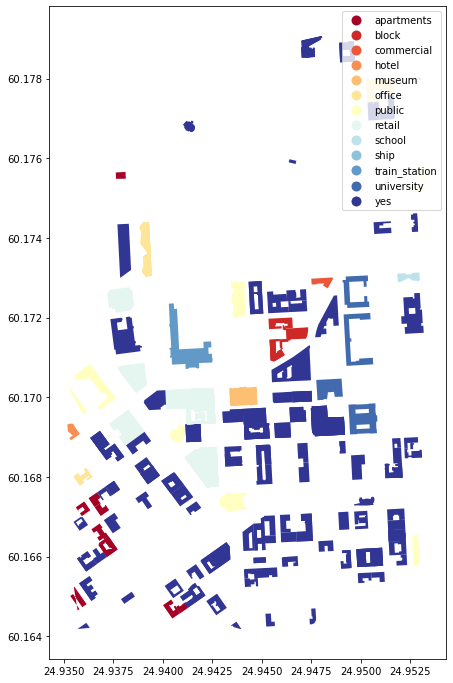

In [29]:
# Adding in building type information

ax = join2.plot(column="building", cmap="RdYlBu", figsize=(12,12), legend=True)

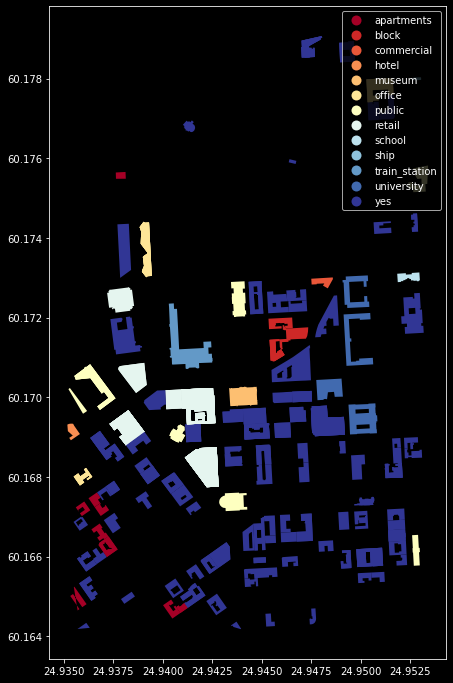

In [30]:
# Plotting the map with a dark background to improve design
with plt.style.context('dark_background'):
  ax = join2.plot(column="building", cmap="RdYlBu", figsize=(12,12), legend=True)


# Advanced Analysis Example: Length of Travel Time Using Path Analysis

For this example, the author is considering the length of time different railway journeys take from an original address. Ultimately, we see that the farther away a railway line is from the original address, the longer the travel time. 

This example is entirely sourced from here: https://sustainability-gis.readthedocs.io/en/latest/lessons/L2/spatial_network_analysis.html 

Please check out the site for more information on this project and more associated learning resources. 

In [ ]:
!pip install -q mapclassify
!pip install -q osmnx

In [ ]:
from pyrosm import OSM, get_data
import osmnx as ox
import pandas as pd
import networkx as nx

def road_class_to_kmph(road_class):
    """
    Returns a speed limit value based on road class, 
    using typical Finnish speed limit values within urban regions.
    """
    if road_class == "motorway":
        return 100
    elif road_class == "motorway_link":
        return 80
    elif road_class in ["trunk", "trunk_link"]:
        return 60
    elif road_class == "service":
        return 30
    elif road_class == "living_street":
        return 20
    else:
        return 50
    
def assign_speed_limits(edges):
    # Separate rows with / without speed limit information 
    mask = edges["maxspeed"].isnull()
    edges_without_maxspeed = edges.loc[mask].copy()
    edges_with_maxspeed = edges.loc[~mask].copy()

    # Apply the function and update the maxspeed
    edges_without_maxspeed["maxspeed"] = edges_without_maxspeed["highway"].apply(road_class_to_kmph)
    edges = edges_with_maxspeed.append(edges_without_maxspeed)
    edges["maxspeed"] = edges["maxspeed"].astype(int)
    edges["travel_time_seconds"] = edges["length"] / (edges["maxspeed"]/3.6)
    return edges
    
# Fetch data for Helsinki
osm = OSM(get_data("helsinki"))
nodes, edges = osm.get_network(network_type="driving", nodes=True)

# Assign speed limits for missing ones based on road classs information
edges = assign_speed_limits(edges)

Downloaded Protobuf data 'Helsinki.osm.pbf' (30.62 MB) to:
'/tmp/pyrosm/Helsinki.osm.pbf'


In [ ]:
# Create a graph
G2 = osm.to_graph(nodes, edges, graph_type="networkx")

In [ ]:
# Calculate travel times from central railway station
orig_address = "Rautatientori, Helsinki"
orig_y, orig_x = ox.geocode(orig_address)  # notice the coordinate order (y, x)!
orig_node_id, dist_to_orig = ox.get_nearest_node(G2, point=(orig_y, orig_x), method='haversine', return_dist=True)
travel_times = nx.single_source_dijkstra_path_length(G2, source=orig_node_id, weight='travel_time_seconds')

# Convert to DataFrame and add column names
travel_times_df = pd.DataFrame([list(travel_times.keys()), list(travel_times.values())]).T
travel_times_df.columns = ['node_id', 'travel_time']
nodes_t = nodes.merge(travel_times_df, left_on='id', right_on='node_id')

# Convert travel time to minutes
nodes_t["travel_time"] = (nodes_t["travel_time"] / 60).round(0)

/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)


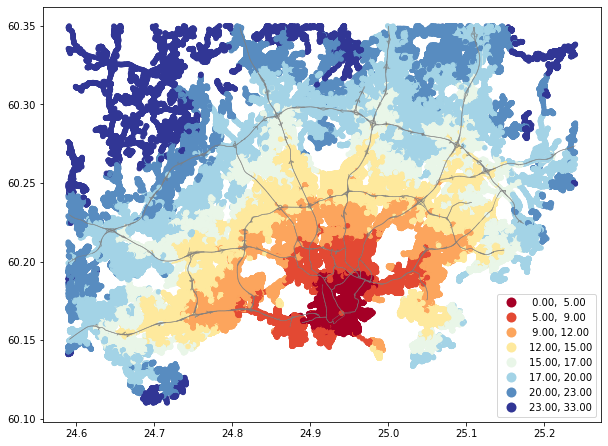

In [ ]:
# Plot the results
main_roads = edges.loc[edges["highway"].isin(["motorway", "motorway_link", "trunk", "trunk_link", "primary", "primary_link"])]
ax = main_roads.plot(lw=0.5, color='gray', zorder=3, figsize=(10,10))
ax = nodes_t.plot('travel_time', ax=ax, cmap='RdYlBu', scheme='natural_breaks', k=8, markersize=20, legend=True)

# Conclusions

In this case, we have reviewed a few different approaches to spatial analysis, focusing on some basic conecepts and ideas. Hopefully, this session has acted as a wuick primer to get you familiar with the types of things that can be done using Python. There are a number of project where spatial methods could be beneficial, but as always, the methods and approaches shouldbe conceptually aligned with the questions at hand and the data available. 

# Resources

Spatial Regression Example: https://sustainability-gis.readthedocs.io/en/latest/lessons/L4/spatial_regression.html

Pyrosm Documentation: https://pyrosm.readthedocs.io/en/latest/basics.html

Folium Documentation: https://python-visualization.github.io/folium/index.html

Geopandas Documentation: https://geopandas.org/docs/user_guide.html



